# Three-species community modules

### Resource competition

$$ \begin{aligned}
\frac{dN_1}{dt} &= \frac{\chi_1 a_1 N_1 R}{1+a_1h_1R} - m_1 N_1\\
\frac{dN_2}{dt} &= \frac{\chi_2 a_2 N_2 R}{1+a_2h_2R} - m_2 N_2\\
\frac{dR}{dt} &= rR\left(1-\frac{R}{K}\right) - \frac{a_1 N_1 R}{1+a_1h_1R} - \frac{a_2 N_2 R}{1+a_2h_2R}
\end{aligned}$$


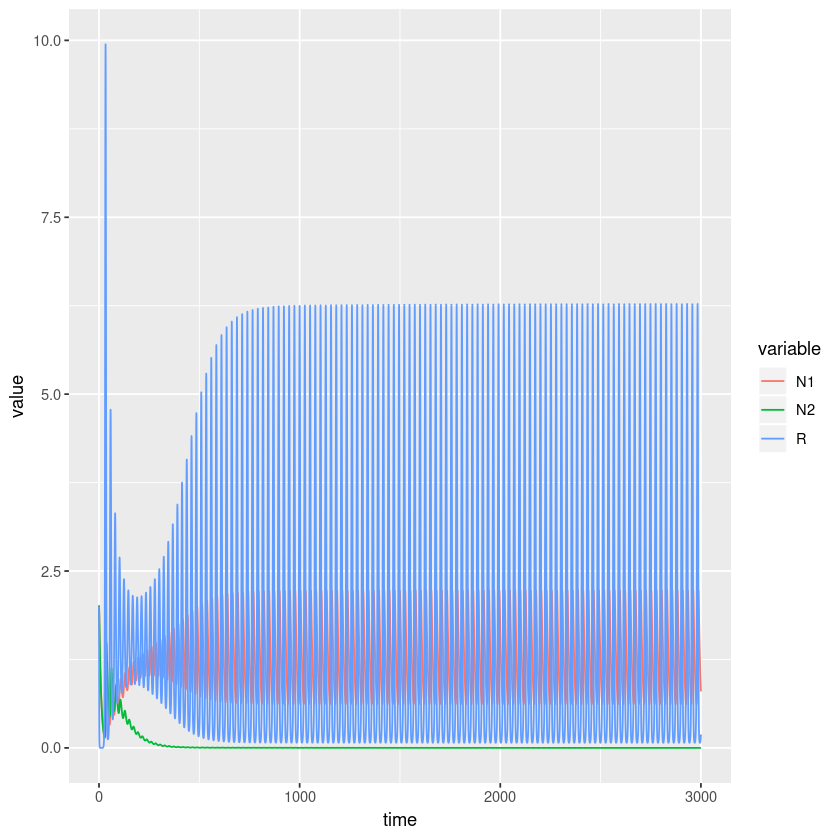

In [40]:
library(deSolve)
library(ggplot2)

# time sequence 
time <- seq(0, 3000, by = 0.2)

# parameters: a named vector
parameters <- c(r = 2,
                K = 18,
                a1 = 0.8,
                a2 = 0.6,
                h1 = 0.1,
                h2 = 0,
                chi1 = 0.1,
                chi2 = 0.1,
                m1 = 0.1,
                m2=0.1)

# initial condition: a named vector
state <- c(N1 = 2, N2 = 2, R = 2)

# R function to calculate the value of the derivatives at each time value
# Use the names of the variables as defined in the vectors above
compAparente <- function(t, state, parameters){
  with(as.list(c(state, parameters)), {
      dN1 = chi1 * a1 * N1 * R/(1+a1*h1*R) - m1*N1
      dN2 = chi2 * a2 * N2 * R/(1+a2*h2*R) - m2*N2
      dR = R * (1-R/K) - a1 * N1 * R/(1+a1*h1*R) - a2 * N2 * R/(1+a2*h2*R)
      return(list(c(dN1, dN2, dR)))
  })
}
## Integration with 'ode'
out <- ode(y = state, times = time, func = compAparente,
           parms = parameters)

## Ploting
# required by ggplot: data object must be a data frame
out.df = as.data.frame(out)
library(reshape2)
# this makes plotting easier by puting all variables in a single column
out.m = melt(out.df, id.vars='time')

p <- ggplot(out.m, aes(time, value, color = variable)) + geom_line()
print(p)

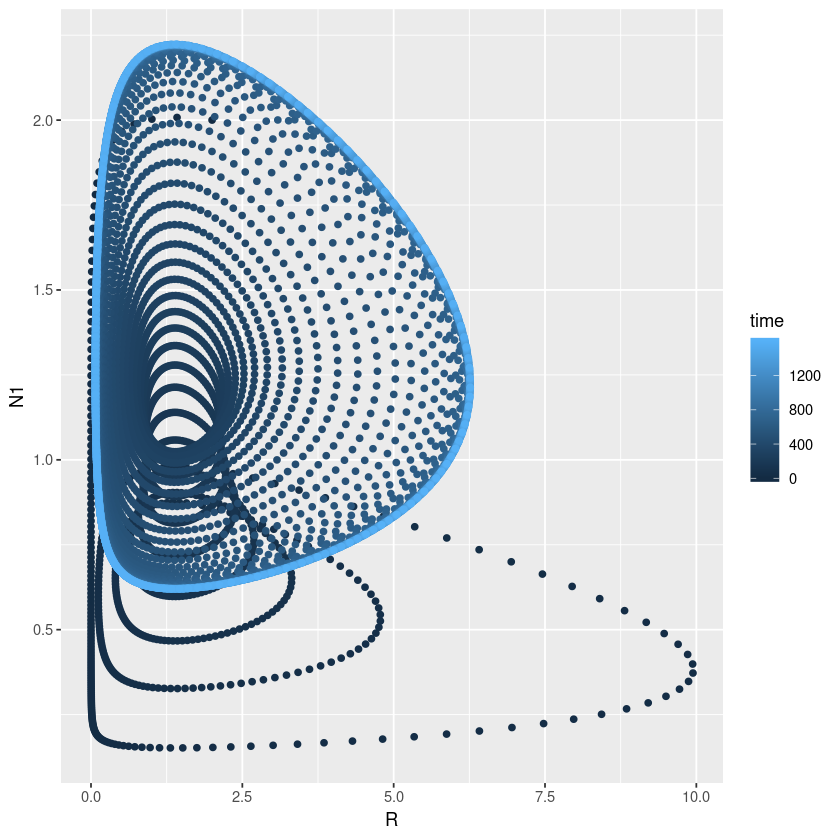

In [43]:
p2 <- ggplot(data = out.df[1:8000,], aes(x = R, N1, color = time)) + geom_point()
print(p2)

### Resource competition - non-equilibrium coexistence

$$ \begin{aligned}
\frac{dN_1}{dt} &= \frac{\chi_1 a_1 N_1 R}{\Gamma+R} - m_1 N_1\\
\frac{dN_2}{dt} &= \chi_2 a_2 N_2 R - m_2 N_2\\
\frac{dR}{dt} &= rR\left(1-\frac{R}{K}\right) - \frac{a_1 N_1 R}{\Gamma+R} - a_2 N_2 R
\end{aligned}$$


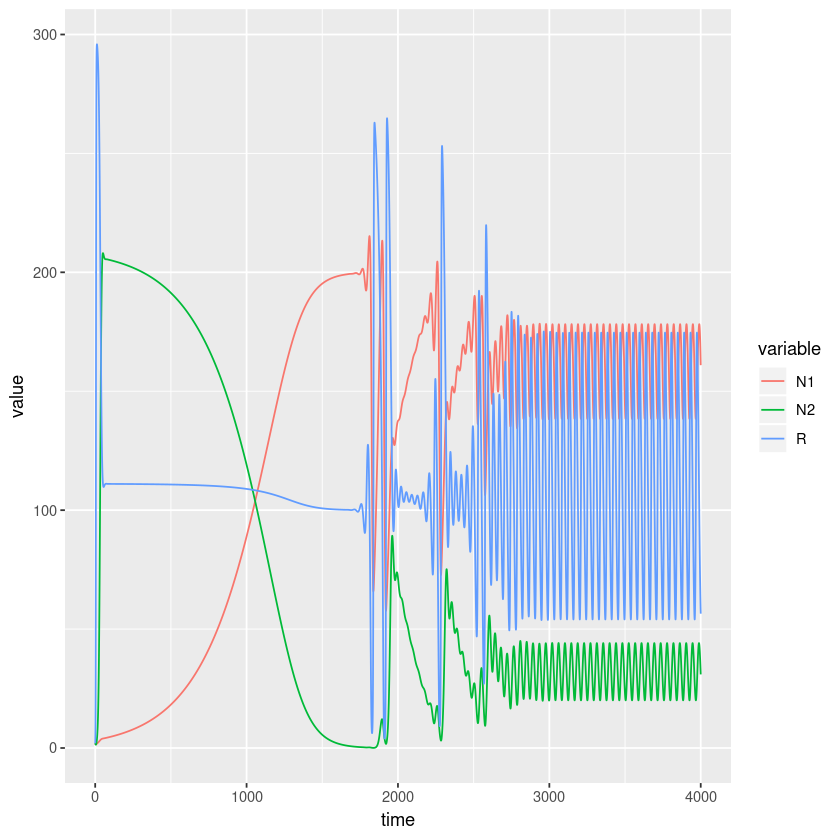

In [47]:
library(deSolve)
library(ggplot2)

# time sequence 
time <- seq(0, 4000, by = 0.2)

# parameters: a named vector
parameters <- c(r = 0.1,
                K = 300,
                a1 = 0.5,
                a2 = 0.003,
                gamma = 50,
                chi1 = 0.3,
                chi2 = 0.33,
                m1 = 0.1,
                m2=0.11)

# initial condition: a named vector
state <- c(N1 = 2, N2 = 2, R = 2)

# R function to calculate the value of the derivatives at each time value
# Use the names of the variables as defined in the vectors above
compAparente <- function(t, state, parameters){
  with(as.list(c(state, parameters)), {
      dN1 = chi1 * a1 * N1 * R/(gamma+R) - m1*N1
      dN2 = chi2 * a2 * N2 * R - m2*N2
      dR = R * (1-R/K) - a1 * N1 * R/(gamma+R) - a2 * N2 * R
      return(list(c(dN1, dN2, dR)))
  })
}
## Integration with 'ode'
out <- ode(y = state, times = time, func = compAparente,
           parms = parameters)

## Ploting
# required by ggplot: data object must be a data frame
out.df = as.data.frame(out)
library(reshape2)
# this makes plotting easier by puting all variables in a single column
out.m = melt(out.df, id.vars='time')

p <- ggplot(out.m, aes(time, value, color = variable)) + geom_line()
print(p)

### Apparent competition

$$ \begin{aligned}
\frac{dN_1}{dt} &= r_1 N_1 - a_1 N_1 P\\
\frac{dN_2}{dt} &= r_2 N_2 - a_2 N_2 P\\
\frac{dP}{dt} &= P \left(\chi_1 a_1 N_1 + \chi_2 a_2 N_2 - m\right)
\end{aligned}$$


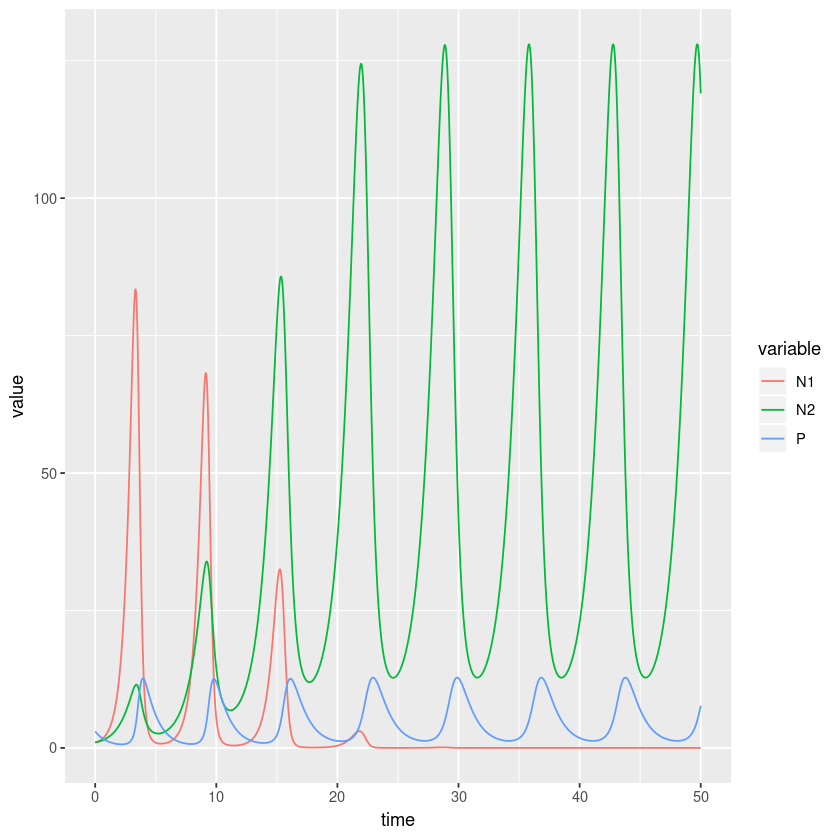

In [38]:
library(deSolve)
library(ggplot2)

# time sequence 
time <- seq(0, 50, by = 0.01)

# parameters: a named vector
parameters <- c(r1 = 2,
                r2 = 1,
                a1 = 0.5,
                a2 = 0.2,
                chi1 = 0.1,
                chi2 = 0.1,
                m = 1)

# initial condition: a named vector
state <- c(N1 = 1, N2 = 1, P = 3)

# R function to calculate the value of the derivatives at each time value
# Use the names of the variables as defined in the vectors above
compAparente <- function(t, state, parameters){
  with(as.list(c(state, parameters)), {
      dN1 = r1 * N1 - a1 * N1 * P
      dN2 = r2 * N2 - a2 * N2 * P
      dP = P * (chi1 * a1 * N1 + chi2 * a2 * N2- m)
      return(list(c(dN1, dN2, dP)))
  })
}
## Integration with 'ode'
out <- ode(y = state, times = time, func = compAparente,
           parms = parameters)

## Ploting
# required by ggplot: data object must be a data frame
out.df = as.data.frame(out)
library(reshape2)
# this makes plotting easier by puting all variables in a single column
out.m = melt(out.df, id.vars='time')

p <- ggplot(out.m, aes(time, value, color = variable)) + geom_line()
print(p)

### Linear chain

$$ \begin{aligned}
\frac{dR}{dt} &= r R \left(1 - \frac{R}{K}\right)- \alpha R C \\
\frac{dC}{dt} &= \chi_C \alpha R C - \beta CP -m_C C\\
\frac{dP}{dt} &= \chi_P \beta C P - m_P P
\end{aligned}$$


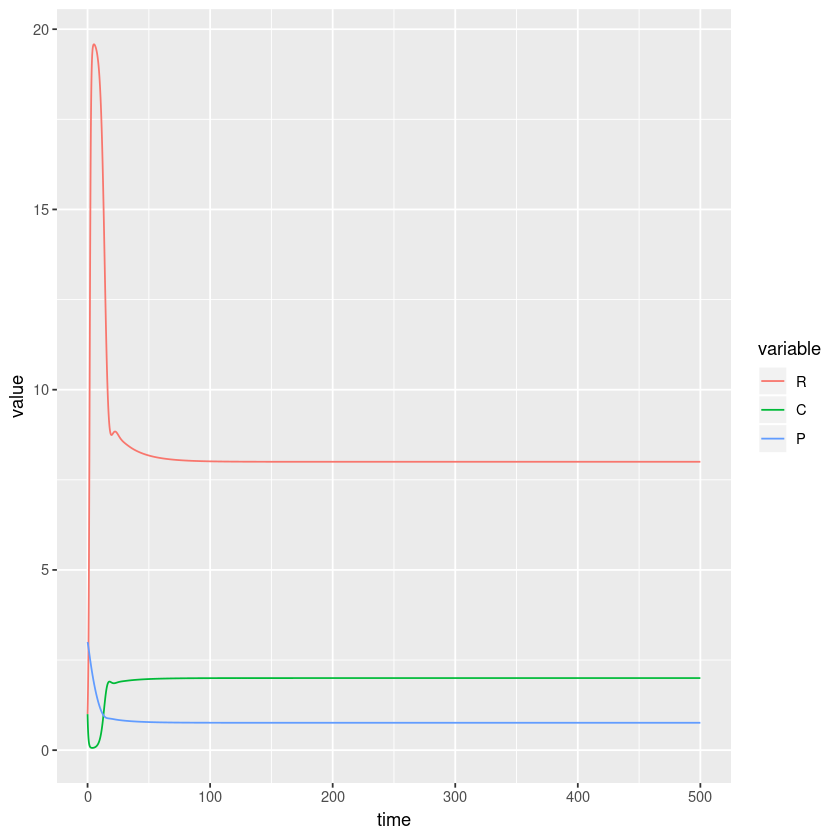

In [4]:
library(deSolve)
library(ggplot2)
# time sequence 
time <- seq(0, 500, by = 0.1)

# parameters: a named vector
parameters <- c(r = 2,
                K = 20,
                alpha = 0.6,
                beta = 0.5,
                chiC = 0.1,
                chiP = 0.1,
                mC = 0.1,
                mP = 0.1)

# initial condition: a named vector
state <- c(R = 1, C = 1, P = 3)

# R function to calculate the value of the derivatives at each time value
# Use the names of the variables as defined in the vectors above
chain <- function(t, state, parameters){
  with(as.list(c(state, parameters)), {
      dR = r * R * (1 - R/K) - alpha * R * C
      dC = chiC * alpha * R * C - beta * P * C - mC * C
      dP = P * (chiP * beta * C - mP)
      return(list(c(dR, dC, dP)))
  })
}
## Integration with 'ode'
out <- ode(y = state, times = time, func = chain,
           parms = parameters)

## Ploting
# required by ggplot: data object must be a data frame
out.df = as.data.frame(out)
library(reshape2)
# this makes plotting easier by puting all variables in a single column
out.m = melt(out.df, id.vars='time')

p <- ggplot(out.m, aes(time, value, color = variable)) + geom_line()
print(p)

### Intraguild predation

$$ \begin{aligned}
\frac{dR}{dt} &= r R\left(1-\frac{R}{K}\right) - a_C R C - a_P R P\\
\frac{dC}{dt} &= \chi_C a_C R C - a_I CP -m_C C\\
\frac{dP}{dt} &= \chi_P a_P R P + \chi_I a_I CP- m_P P
\end{aligned}$$

Condição para coexistẽncia;

$$ R_C^* < R_P^*$$

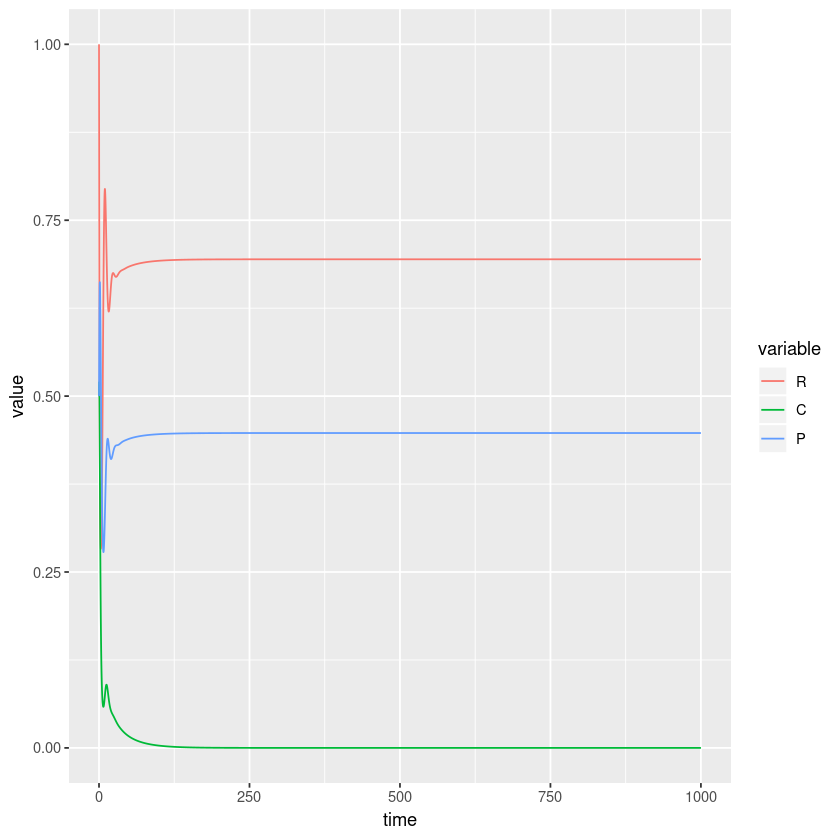

In [36]:
library(deSolve)
library(ggplot2)

# time sequence 
time <- seq(0, 1000, by = 0.1)

# parameters: a named vector
parameters <- c(r = 1,
                K = 1.5,
                aC = 1,
                aP = 1.2,
                aI = 0.5,
                chiC = 1,
                chiP = 0.6,
                chiI = 1,
                mC = 0.5,
                mP = 0.5)

# initial condition: a named vector
state <- c(R = 1, C = 0.5, P = 0.5)

# R function to calculate the value of the derivatives at each time value
# Use the names of the variables as defined in the vectors above
intraguild <- function(t, state, parameters){
  with(as.list(c(state, parameters)), {
      dR = r * R * (1-R/K) - aC * C * R - aP * P * R
      dC = chiC * aC * C * R - mC*C - aI * C * P
      dP = chiP * aP * P * R - mP*P + chiI * aI * C * P
      return(list(c(dR, dC, dP)))
  })
}
## Integration with 'ode'
out <- ode(y = state, times = time, func = intraguild,
           parms = parameters)

## Ploting
# required by ggplot: data object must be a data frame
out.df = as.data.frame(out)
library(reshape2)
# this makes plotting easier by puting all variables in a single column
out.m = melt(out.df, id.vars='time')

p <- ggplot(out.m, aes(time, value, color = variable)) + geom_line()
print(p)